主にAIモデル構築で使用するサンプルプログラム集となります。   
サンプルデータをダウンロードして進めます。  

## **データのダウンロード**

In [18]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')

display(df.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## **スケーリング（正規化/標準化）**

標準化

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = df[['age','fare']]
df_sc = sc.fit_transform(X)
df_sc = pd.DataFrame(df_sc)
df_sc.columns = ['age','fare']
df_sc.head()

,age,fare
0,-0.530377,-0.502445
1,0.571831,0.786845
2,-0.254825,-0.488854
3,0.365167,0.420730
4,0.365167,-0.486337


In [24]:
df_sc.describe()

,age,fare
count,7.140000e+02,8.910000e+02
mean,2.388379e-16,3.987333e-18
std,1.000701e+00,1.000562e+00
min,-2.016979e+00,-6.484217e-01
25%,-6.595416e-01,-4.891482e-01
50%,-1.170488e-01,-3.573909e-01
75%,5.718310e-01,-2.424635e-02
max,3.465126e+00,9.667167e+00


正規化

In [25]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X = df[['age','fare']]
df_norm = mm.fit_transform(X)
df_norm = pd.DataFrame(df_norm)
df_norm.columns = ['age','fare']
df_norm.head()

,age,fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


In [26]:
df_norm.describe()

,age,fare
count,714.000000,891.000000
mean,0.367921,0.062858
std,0.182540,0.096995
min,0.000000,0.000000
25%,0.247612,0.015440
50%,0.346569,0.028213
75%,0.472229,0.060508
max,1.000000,1.000000


## **カテゴリカル変数**

In [30]:
pd.get_dummies(df['sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [29]:
pd.get_dummies(df['pclass'],drop_first=True)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


## **クラスタリング**

K-means

In [36]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
load_data = load_iris()
df = pd.DataFrame(load_data.data, columns = load_data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
# クラスタリグをやってみます
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0)
cls_data = df.copy()
model.fit(cls_data)
cluster = model.predict(cls_data)

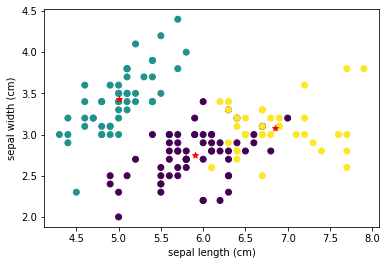

In [41]:
cluster_center = pd.DataFrame(model.cluster_centers_)
cluster_center.columns = cls_data.columns[:4]
cls_data["cluster"] = cluster
plt.scatter(cls_data['sepal length (cm)'], cls_data['sepal width (cm)'],c=cls_data['cluster'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(cluster_center['sepal length (cm)'], cluster_center['sepal width (cm)'], marker='*', color='red')

少し変わったデータの可視化  
(密度をベースとしてクラスタリング)

Text(0.5, 0.98, 'moon')

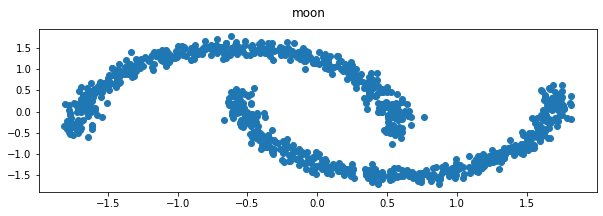

In [42]:
# データを作成します
from sklearn import preprocessing
from sklearn import datasets

X_moon = datasets.make_moons(n_samples=1000, noise=0.05, random_state=0)[0]
sc=preprocessing.StandardScaler()
X_moon_norm=sc.fit_transform(X_moon)
x_moon=X_moon_norm[:,0]
y_moon=X_moon_norm[:,1]
plt.figure(figsize=(10,3))
plt.scatter(x_moon,y_moon)
plt.suptitle("moon")

Text(0.5, 0.98, 'k-means')

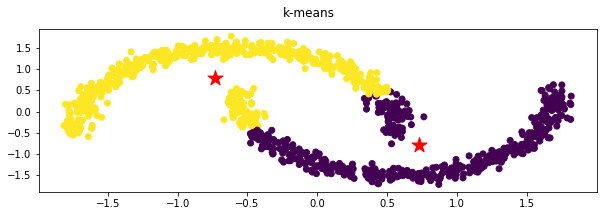

In [43]:
# K-meansでクラスタリングしても上手くいかない
km_moon=KMeans(n_clusters=2)
z_km_moon=km_moon.fit(X_moon_norm)
plt.figure(figsize=(10,3))
plt.scatter(x_moon,y_moon, c=z_km_moon.labels_)
plt.scatter(z_km_moon.cluster_centers_[:,0],z_km_moon.cluster_centers_[:,1],s=250, marker="*",c="red")
plt.suptitle("k-means")

Text(0.5, 0.98, 'dbscan')

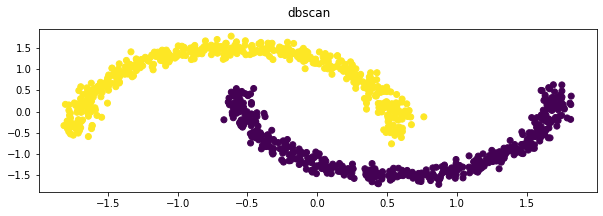

In [44]:
# DBSCN(密度ベースのクラスタリング手法)でクラスタリング
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5, metric="euclidean")
labels = dbscan.fit_predict(X_moon_norm)
plt.figure(figsize=(10,3))
plt.scatter(x_moon,y_moon, c=labels)
plt.suptitle("dbscan")